In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import copy
import gzip

In [2]:
%run ../codes/branchingv1.py
%run ../codes/colour_settings.py

In [3]:
WN = np.loadtxt('W_avg.csv')
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [4]:
num_fips = len(pop)
T = 40
num_ens = 1000 ##300

In [5]:
# pathogen characteristics
# initialize parameters
R0 = 2.5 
r = 0.01 ## the parameters
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b
alpha = 0.1 # reporting rate 10%
# R0,r,Z;Zb;D;Db,alpha
para_i = np.array([[R0], [r], [Z], [Zb], [D], [Db], [alpha]])

In [6]:
#initialize variables
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859
i0 = 100 ## the starting t=0, in matlab it is 1
initials = (l0,i0)

In [6]:
x_cutoff = 100
r = 0.01 ## parameters (in the paper of Lloyd smith is the k)
R0 = 2.5  ## the model input

p = r/(R0+r)

weights = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
    weights[i] = temp1
weights_n = weights/np.sum(weights)

In [4]:
E_NewInf1 =  np.load('NewInf_r_01.npy')
E_NewInf2 =  np.load('NewInf_r_1.npy')
E_NewInf3 =  np.load('NewInf_r_5.npy')
# E_NewInf4 =  np.load('NewInf_r_10.npy')

# E_NewInf5 =  np.load('NewInf_r_0.01.npy')
# E_NewInf6 =  np.load('NewInf_r_0.03162278.npy')
# E_NewInf7 =  np.load('NewInf_r_0.02.npy')
E_NewInf8 =  np.load('NewInf_r_0.05.npy')

In [5]:
E_daily_per_pop1 = E_NewInf1[:,:,:60]/pop[None,:,None]*100000
E_daily_per_pop2 = E_NewInf2[:,:,:60]/pop[None,:,None]*100000
E_daily_per_pop3 = E_NewInf3[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop4 = E_NewInf4[:,:,:60]/pop[None,:,None]*100000

# E_daily_per_pop5 = E_NewInf5[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop6 = E_NewInf6[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop7 = E_NewInf7[:,:,:60]/pop[None,:,None]*100000
E_daily_per_pop8 = E_NewInf8[:,:,:60]/pop[None,:,None]*100000

In [6]:
num_county1 = np.sum(E_daily_per_pop1[:,:,:60]>10,axis=1)
num_county2 = np.sum(E_daily_per_pop2[:,:,:60]>10,axis=1)
num_county3 = np.sum(E_daily_per_pop3[:,:,:60]>10,axis=1)
# num_county4 = np.sum(E_daily_per_pop4[:,:,:60]>10,axis=1)

# num_county5 = np.sum(E_daily_per_pop5[:,:,:60]>10,axis=1)
# num_county6 = np.sum(E_daily_per_pop6[:,:,:60]>10,axis=1)
# num_county7 = np.sum(E_daily_per_pop7[:,:,:60]>10,axis=1)
num_county8 = np.sum(E_daily_per_pop8[:,:,:60]>10,axis=1)

In [9]:
mean_county1 = np.mean(num_county1,axis=0)
std_county1 = np.std(num_county1,axis=0)

mean_county2 = np.mean(num_county2,axis=0)
std_county2 = np.std(num_county2,axis=0)

# mean_county5 = np.mean(num_county5,axis=0)
# std_county5 = np.std(num_county5,axis=0)
# mean_county6 = np.mean(num_county6,axis=0)
# std_county6 = np.std(num_county6,axis=0)
# mean_county7 = np.mean(num_county7,axis=0)
# std_county7 = np.std(num_county7,axis=0)
mean_county8 = np.mean(num_county8,axis=0)
std_county8 = np.std(num_county8,axis=0)

In [14]:
NewInf_ode = np.loadtxt('metapop.csv')

In [15]:
infec_perpop = NewInf_ode/pop[:,None]*100000
county_ode = np.sum(infec_perpop>10,axis=0)

(-1.0, 40.0)

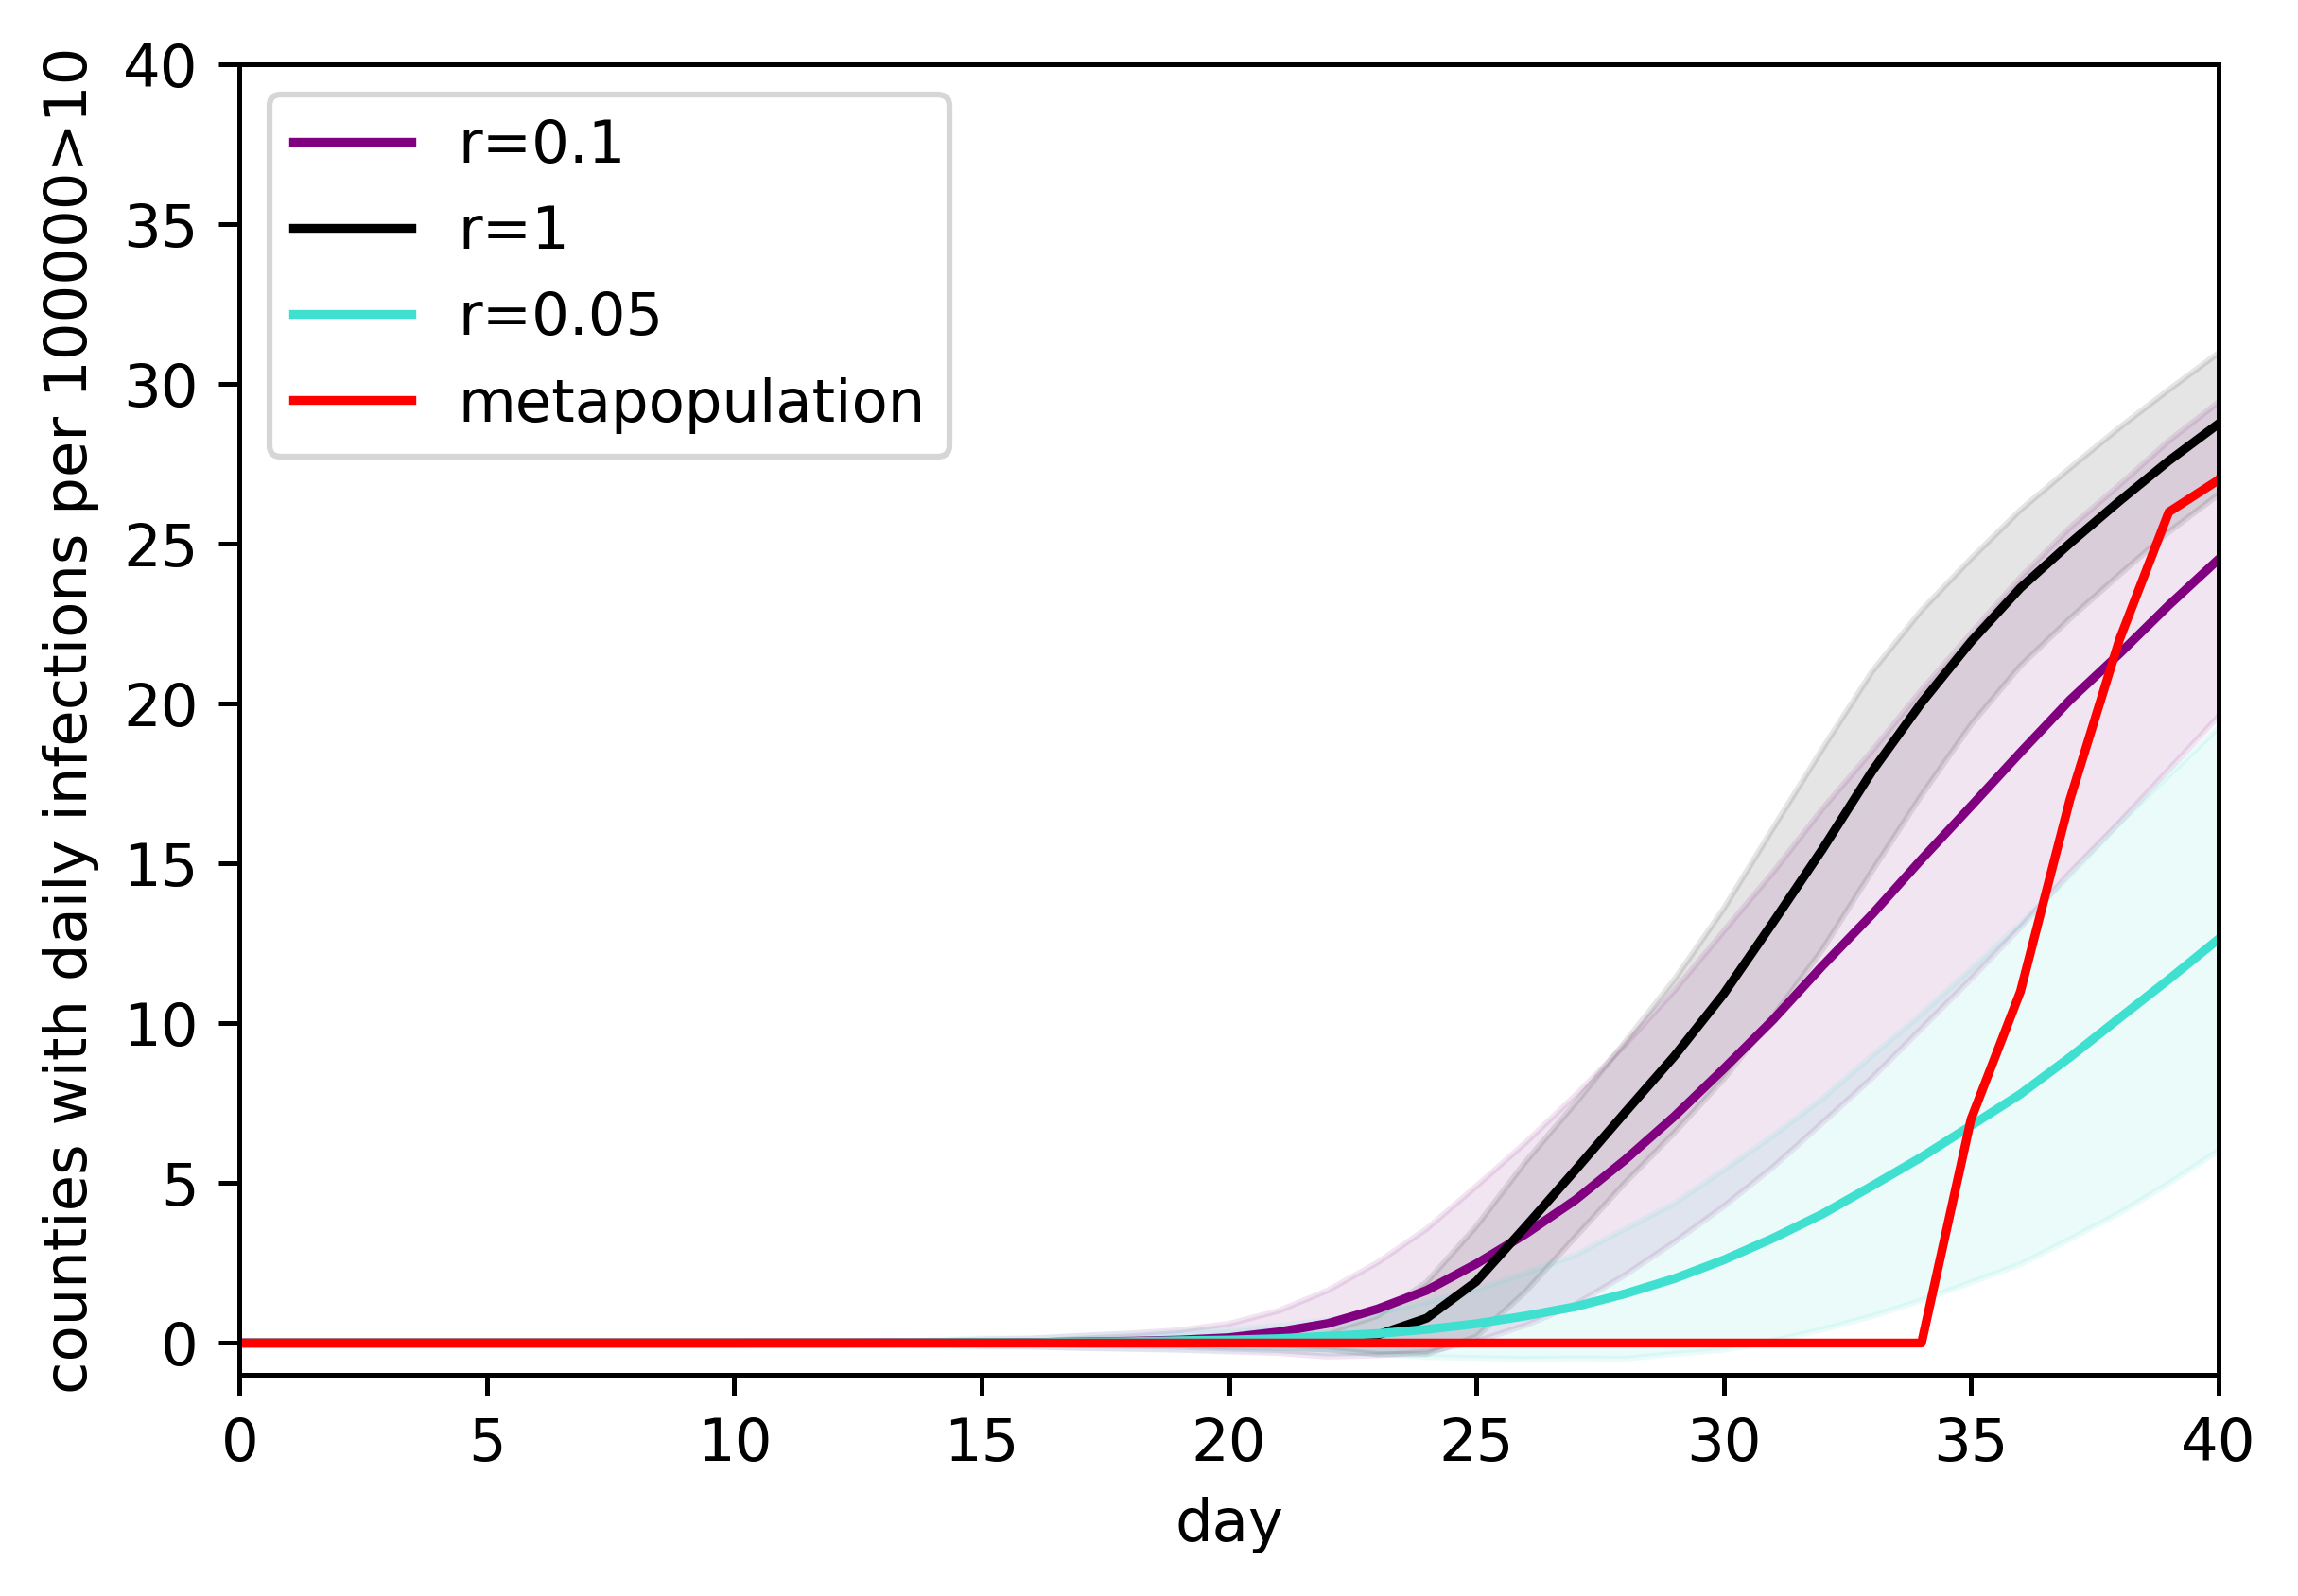

In [18]:
plt.figure(dpi=450,figsize=(6,4))
plt.plot(mean_county1,label='r=0.1',color='purple')
plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,color='purple',alpha=0.1)
plt.plot(mean_county2,label='r=1',color='black')
plt.fill_between(range(60),mean_county2-std_county2,mean_county2 +std_county2,color='black',alpha=0.1)
# plt.plot(np.mean(num_county3,axis=0),label='r=5',color='blue')
# plt.plot(np.mean(num_county4,axis=0),label='r=10',color='cornflowerblue')

# plt.plot(mean_county5,label='r=0.01',color='green')
# plt.fill_between(range(60),mean_county5-std_county5, mean_county5 + std_county5, color='green',alpha=0.1)
# plt.plot(mean_county6,label='r=0.032',color='olive')
# plt.fill_between(range(60),mean_county6-std_county6, mean_county6 + std_county6, color='olive',alpha=0.1)
# plt.plot(mean_county7,label='r=0.02',color='seagreen')
# plt.fill_between(range(60),mean_county7-std_county7, mean_county7 + std_county7, color='seagreen',alpha=0.1)
plt.plot(mean_county8,label='r=0.05',color='turquoise')
plt.fill_between(range(60),mean_county8-std_county8, mean_county8 + std_county8, color='turquoise',alpha=0.1)

plt.plot(county_ode,label='metapopulation',color='red')

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>10')
plt.xlim(0,40)
plt.ylim(-1,40)

In [127]:
# E_daily1 = np.sum(E_NewInf1[:,:,:60],axis=1)
# E_daily2 = np.sum(E_NewInf2[:,:,:60],axis=1)
# E_daily3 = np.sum(E_NewInf3[:,:,:60],axis=1)
# E_daily4 = np.sum(E_NewInf4[:,:,:60],axis=1)

# E_daily5 = np.sum(E_NewInf5[:,:,:60],axis=1)
# E_daily6 = np.sum(E_NewInf6[:,:,:60],axis=1)

# E_daily7 = np.sum(E_NewInf7[:,:,:60],axis=1)
E_daily8 = np.sum(E_NewInf8[:,:,:60],axis=1)

In [128]:
# mean_daily1 = np.mean(E_daily1,axis=0)
# variance_daily1 = np.std(E_daily1,axis=0)

# mean_daily2 = np.mean(E_daily2,axis=0)
# variance_daily2 = np.std(E_daily2,axis=0)

# mean_daily3 = np.mean(E_daily3,axis=0)
# variance_daily3 = np.std(E_daily3,axis=0)

# mean_daily4 = np.mean(E_daily4,axis=0)
# variance_daily4 = np.std(E_daily4,axis=0)

# mean_daily5 = np.mean(E_daily5,axis=0)
# variance_daily5 = np.std(E_daily5,axis=0)

# mean_daily6 = np.mean(E_daily6,axis=0)
# variance_daily6 = np.std(E_daily6,axis=0)

mean_daily7 = np.mean(E_daily7,axis=0)
variance_daily7 = np.std(E_daily7,axis=0)

mean_daily8 = np.mean(E_daily8,axis=0)
variance_daily8 = np.std(E_daily8,axis=0)

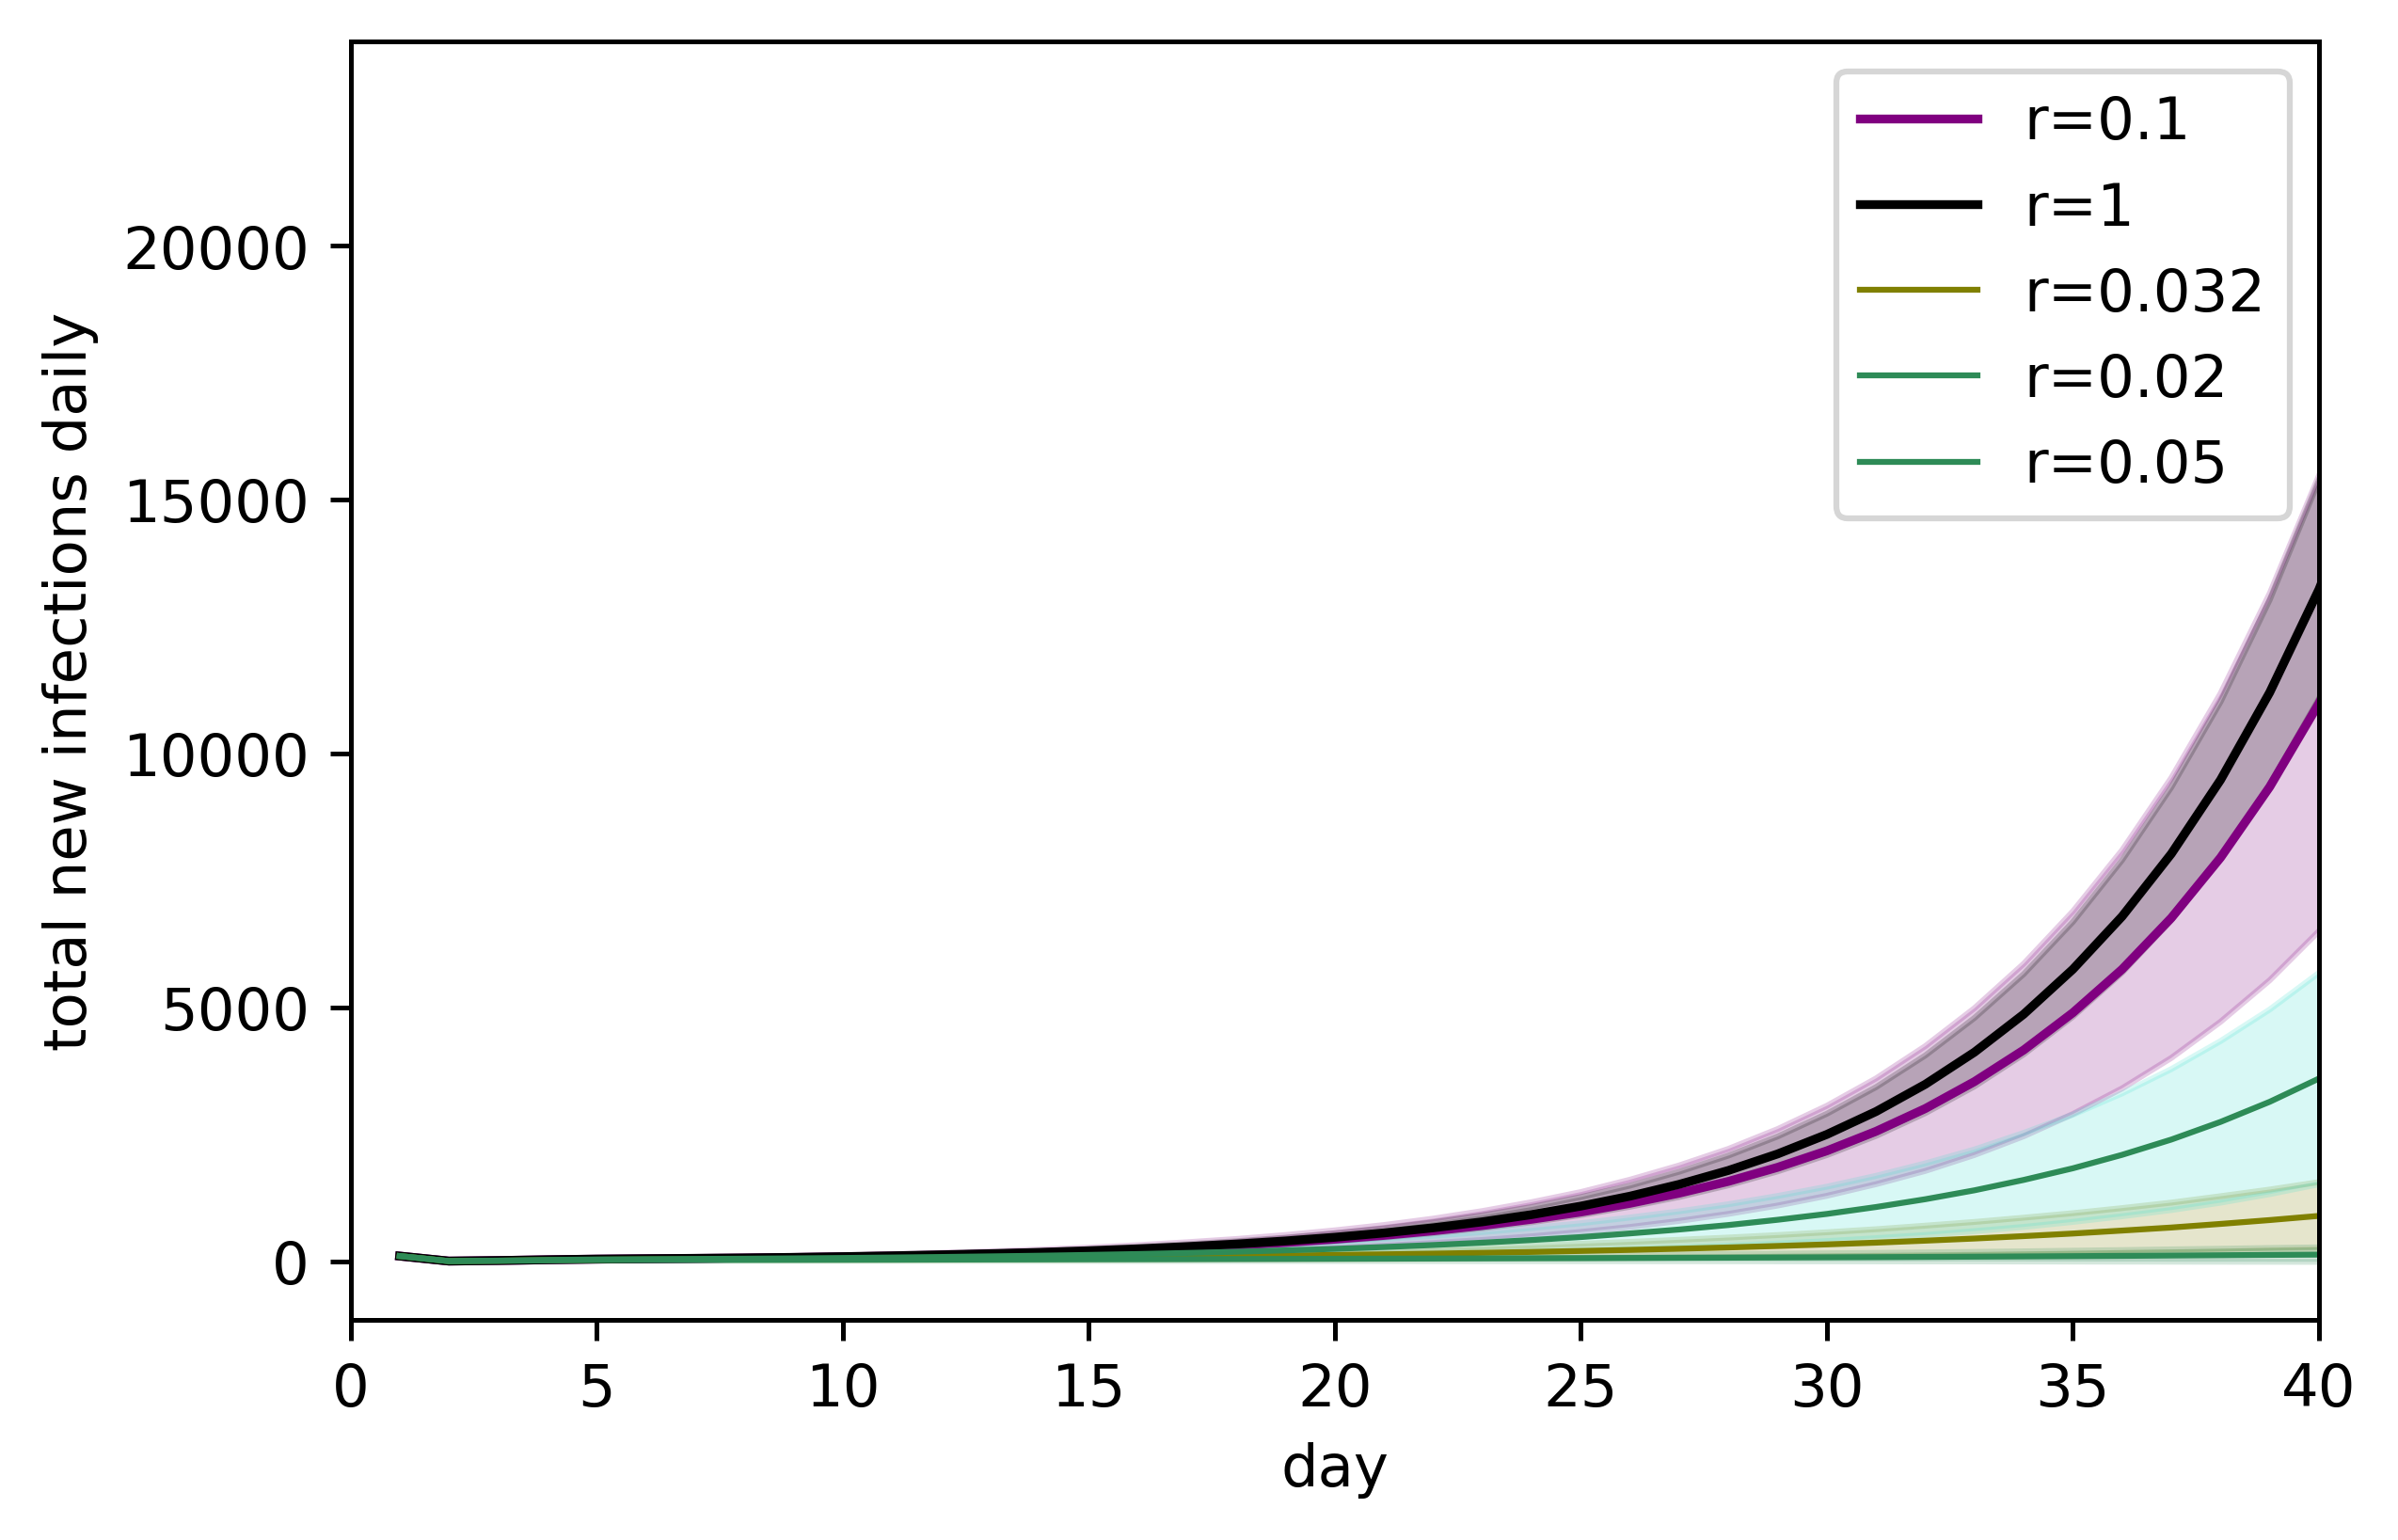

In [132]:
fig, ax = plt.subplots(dpi=450,figsize=(6,4))
x = range(1,61)
 
ax.plot(x, mean_daily1, '-',c='purple',label='r=0.1')
ax.fill_between(x, mean_daily1 - variance_daily1, mean_daily1 + variance_daily1, alpha=0.2,color='purple')

ax.plot(x, mean_daily2, '-',c='black',label='r=1')
ax.fill_between(x, mean_daily2 - variance_daily2, mean_daily2 + variance_daily2, alpha=0.2,color='black')

# ax.plot(x, mean_daily3, '-',c='blue',label='r=5',lw=1)
# ax.fill_between(x, mean_daily3 - variance_daily3, mean_daily3 + variance_daily3, alpha=0.2,color='blue')

# ax.plot(x, mean_daily4, '-',c='cornflowerblue',label='r=10',lw=1)
# ax.fill_between(x, mean_daily4 - variance_daily4, mean_daily4 + variance_daily4, alpha=0.2,color='cornflowerblue')

# ax.plot(x, mean_daily5, '-',c='green',label='r=0.01',lw=1)
# ax.fill_between(x, mean_daily5 - variance_daily5, mean_daily5 + variance_daily5, alpha=0.2,color='green')

ax.plot(x, mean_daily6, '-',c='olive',label='r=0.032',lw=1)
ax.fill_between(x, mean_daily6 - variance_daily6, mean_daily6 + variance_daily6, alpha=0.2,color='olive')

ax.plot(x, mean_daily7, '-',c='seagreen',label='r=0.02',lw=1)
ax.fill_between(x, mean_daily7 - variance_daily7, mean_daily7 + variance_daily7, alpha=0.2,color='seagreen')

ax.plot(x, mean_daily8, '-',c='seagreen',label='r=0.05',lw=1)
ax.fill_between(x, mean_daily8 - variance_daily8, mean_daily8 + variance_daily8, alpha=0.2,color='turquoise')

plt.xlabel('day')
plt.ylabel('total new infections daily')
plt.xlim(0,40)
# plt.ylim(0,3000)
plt.legend()

In [146]:
E_NewInf1n =  np.load('NewInf_r_0.05_randm.npy')
E_NewInf2n =  np.load('NewInf_r_0.1_randm.npy')
# E_NewInf3 =  np.load('NewInf_r_5.npy')
# E_NewInf4 =  np.load('NewInf_r_10.npy')

# E_NewInf5 =  np.load('NewInf_r_0.01.npy')
# E_NewInf6 =  np.load('NewInf_r_0.03162278.npy')
# E_NewInf7 =  np.load('NewInf_r_0.02.npy')
# E_NewInf8 =  np.load('NewInf_r_0.05.npy')

In [147]:
E_daily_per_pop1n = E_NewInf1n[:,:,:60]/pop[None,:,None]*100000
E_daily_per_pop2n = E_NewInf2n[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop3 = E_NewInf3[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop4 = E_NewInf4[:,:,:60]/pop[None,:,None]*100000

# E_daily_per_pop5 = E_NewInf5[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop6 = E_NewInf6[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop7 = E_NewInf7[:,:,:60]/pop[None,:,None]*100000
# E_daily_per_pop8 = E_NewInf8[:,:,:60]/pop[None,:,None]*100000

In [148]:
num_county1n = np.sum(E_daily_per_pop1n[:,:,:60]>10,axis=1)
num_county2n = np.sum(E_daily_per_pop2n[:,:,:60]>10,axis=1)
# num_county3 = np.sum(E_daily_per_pop3[:,:,:60]>10,axis=1)
# num_county4 = np.sum(E_daily_per_pop4[:,:,:60]>10,axis=1)

# num_county5 = np.sum(E_daily_per_pop5[:,:,:60]>10,axis=1)
# num_county6 = np.sum(E_daily_per_pop6[:,:,:60]>10,axis=1)
# num_county7 = np.sum(E_daily_per_pop7[:,:,:60]>10,axis=1)
# num_county8 = np.sum(E_daily_per_pop8[:,:,:60]>10,axis=1)

In [149]:
mean_county1n = np.mean(num_county1n,axis=0)
std_county1n = np.std(num_county1n,axis=0)

mean_county2n = np.mean(num_county2n,axis=0)
std_county2n = np.std(num_county2n,axis=0)

# mean_county5 = np.mean(num_county5,axis=0)
# std_county5 = np.std(num_county5,axis=0)
# mean_county6 = np.mean(num_county6,axis=0)
# std_county6 = np.std(num_county6,axis=0)
# mean_county7 = np.mean(num_county7,axis=0)
# std_county7 = np.std(num_county7,axis=0)
# mean_county8 = np.mean(num_county8,axis=0)
# std_county8 = np.std(num_county8,axis=0)

(0.0, 40.0)

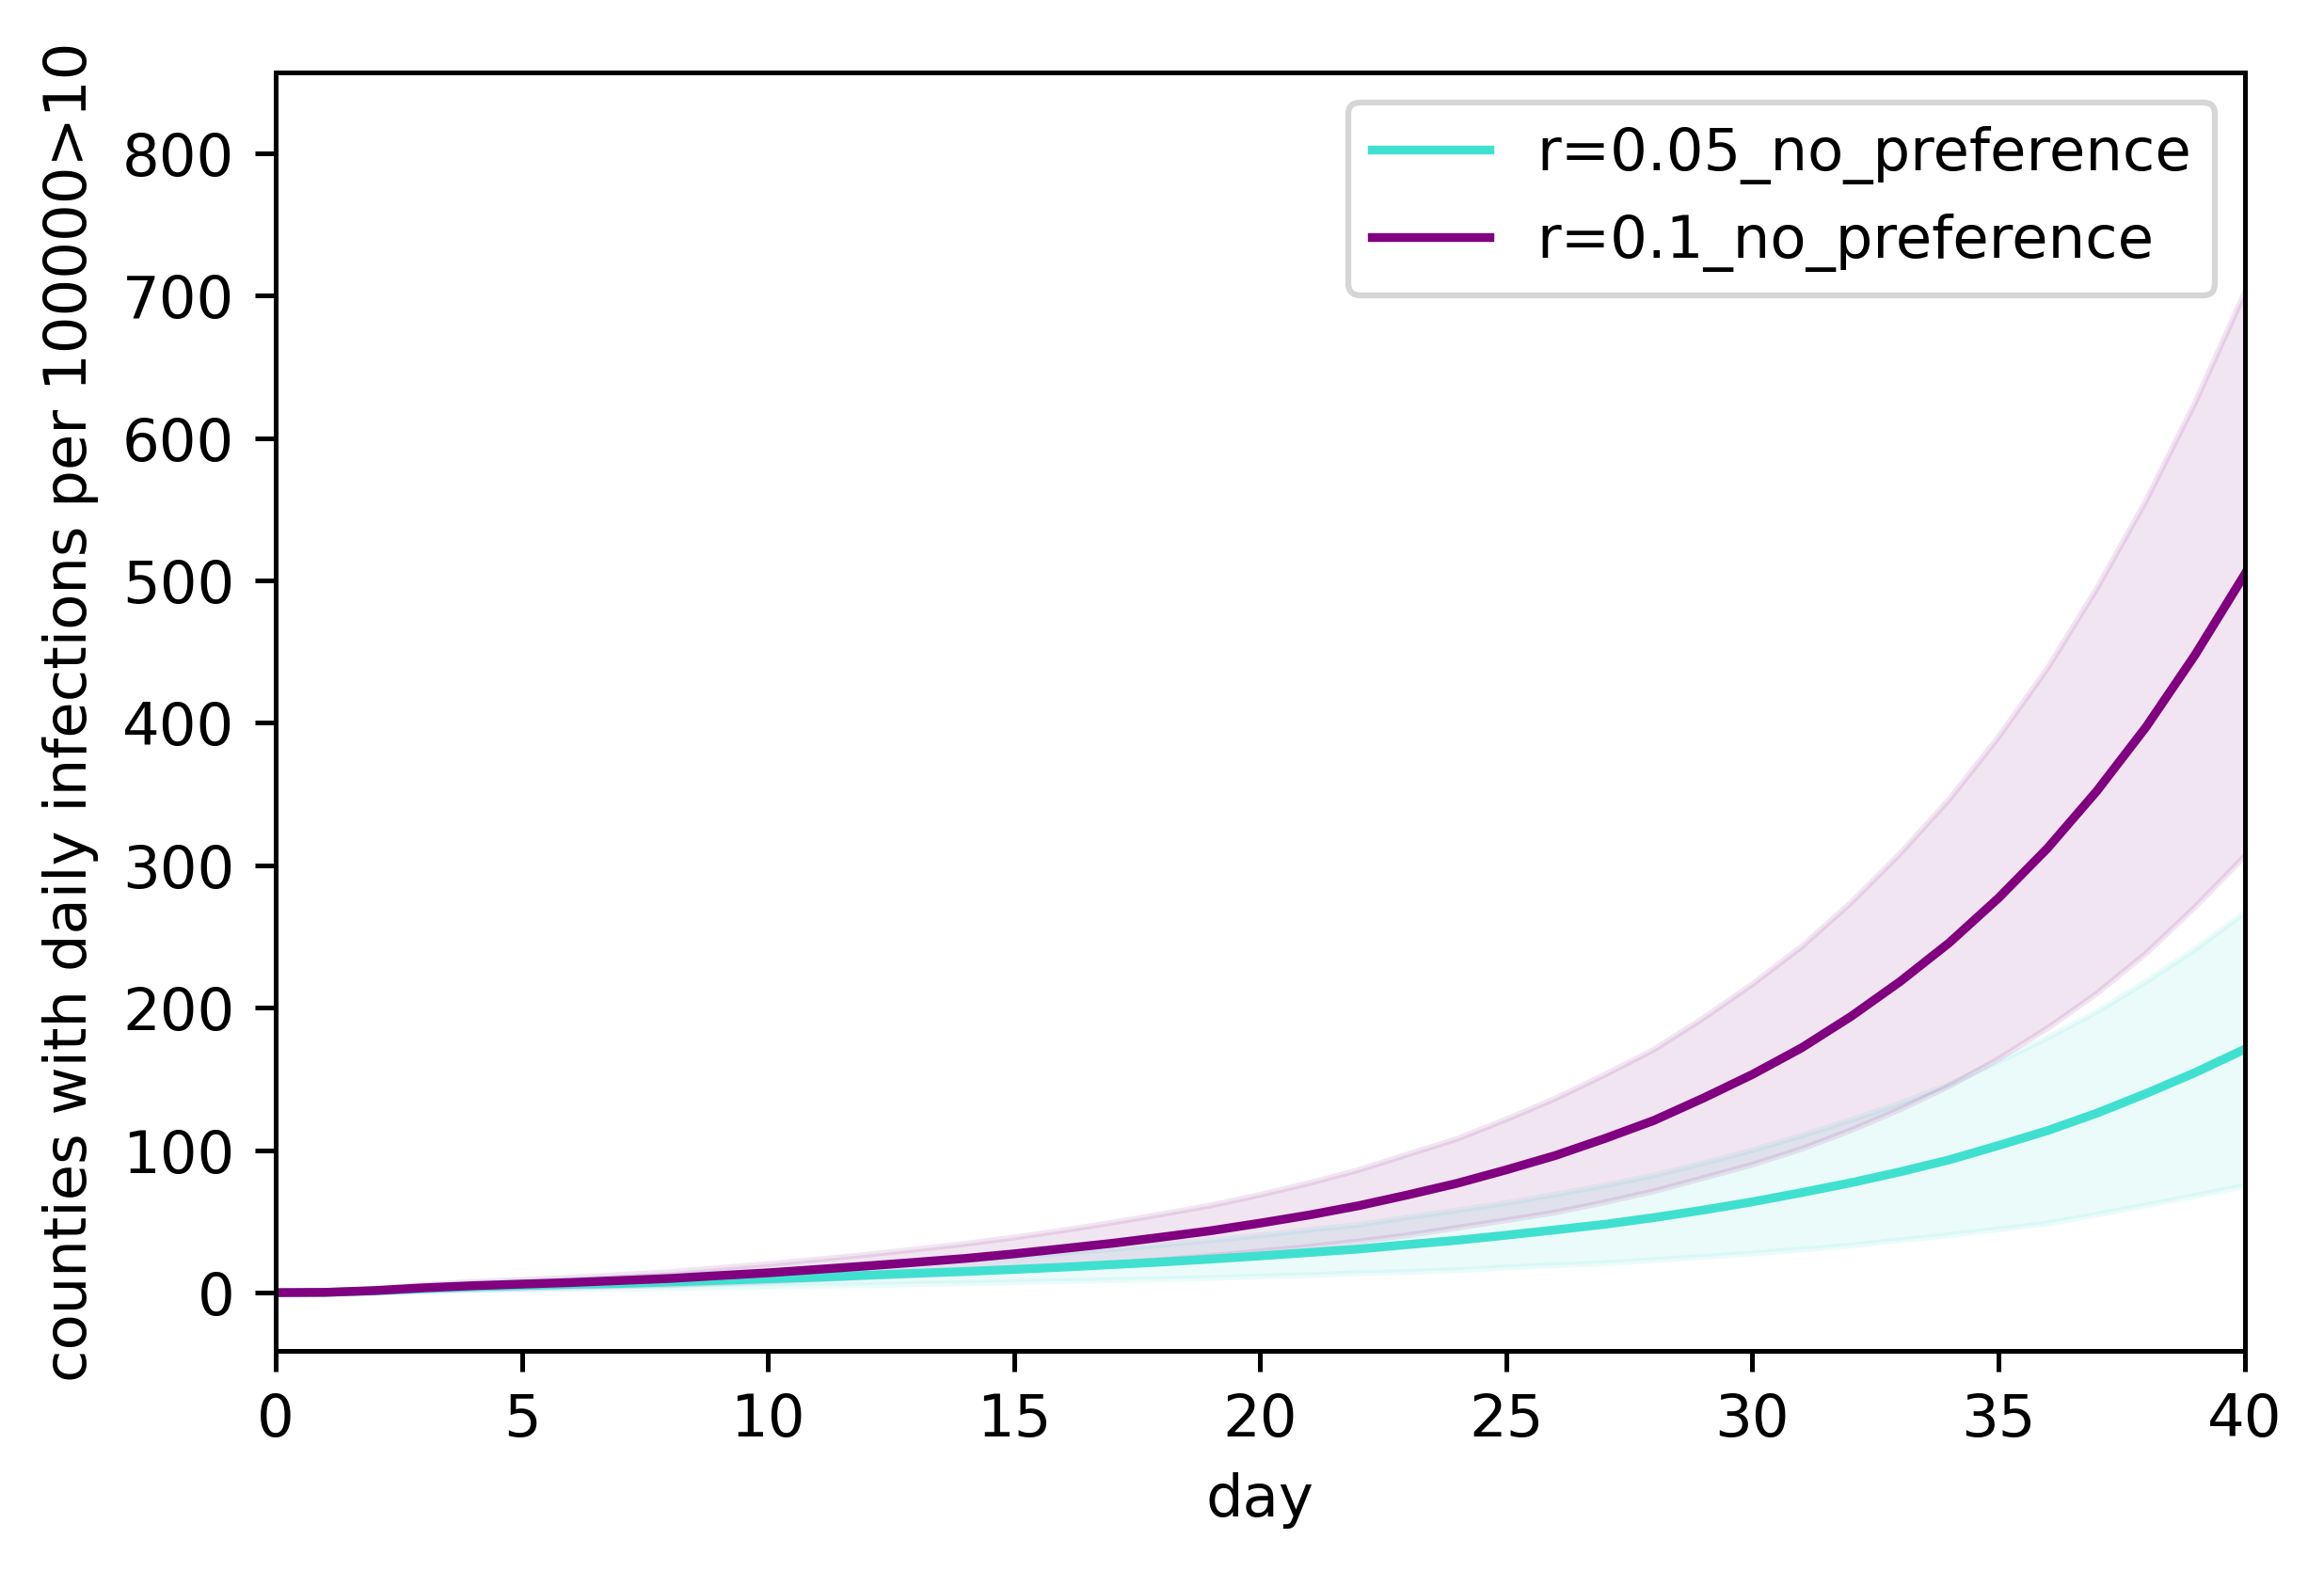

In [160]:
plt.figure(dpi=450,figsize=(6,4))
plt.plot(mean_county1n,label='r=0.05_no_preference',color='turquoise')
plt.fill_between(range(60),mean_county1n-std_county1n,mean_county1n +std_county1n,color='turquoise',alpha=0.1)
plt.plot(mean_county2n,label='r=0.1_no_preference',color='purple')
plt.fill_between(range(60),mean_county2n-std_county2n,mean_county2n +std_county2n,color='purple',alpha=0.1)
# plt.plot(np.mean(num_county3,axis=0),label='r=5',color='blue')
# plt.plot(np.mean(num_county4,axis=0),label='r=10',color='cornflowerblue')

# plt.plot(mean_county5,label='r=0.01',color='green')
# plt.fill_between(range(60),mean_county5-std_county5, mean_county5 + std_county5, color='green',alpha=0.1)
# plt.plot(mean_county6,label='r=0.032',color='olive')
# plt.fill_between(range(60),mean_county6-std_county6, mean_county6 + std_county6, color='olive',alpha=0.1)
# plt.plot(mean_county7,label='r=0.02',color='seagreen')
# plt.fill_between(range(60),mean_county7-std_county7, mean_county7 + std_county7, color='seagreen',alpha=0.1)
# plt.plot(mean_county8,label='r=0.05',color='turquoise')
# plt.fill_between(range(60),mean_county8-std_county8, mean_county8 + std_county8, color='turquoise',alpha=0.1)

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>10')
plt.xlim(0,40)

In [153]:
E_daily1n = np.sum(E_NewInf1n[:,:,:60],axis=1)
E_daily2n = np.sum(E_NewInf2n[:,:,:60],axis=1)
# E_daily3 = np.sum(E_NewInf3[:,:,:60],axis=1)
# E_daily4 = np.sum(E_NewInf4[:,:,:60],axis=1)

# E_daily5 = np.sum(E_NewInf5[:,:,:60],axis=1)
# E_daily6 = np.sum(E_NewInf6[:,:,:60],axis=1)

# E_daily7 = np.sum(E_NewInf7[:,:,:60],axis=1)
# E_daily8 = np.sum(E_NewInf8[:,:,:60],axis=1)

In [156]:
mean_daily1n = np.mean(E_daily1n,axis=0)
variance_daily1n = np.std(E_daily1n,axis=0)

mean_daily2n = np.mean(E_daily2n,axis=0)
variance_daily2n = np.std(E_daily2n,axis=0)

# mean_daily3 = np.mean(E_daily3,axis=0)
# variance_daily3 = np.std(E_daily3,axis=0)

# mean_daily4 = np.mean(E_daily4,axis=0)
# variance_daily4 = np.std(E_daily4,axis=0)

# mean_daily5 = np.mean(E_daily5,axis=0)
# variance_daily5 = np.std(E_daily5,axis=0)

# mean_daily6 = np.mean(E_daily6,axis=0)
# variance_daily6 = np.std(E_daily6,axis=0)

# mean_daily7 = np.mean(E_daily7,axis=0)
# variance_daily7 = np.std(E_daily7,axis=0)

# mean_daily8 = np.mean(E_daily8,axis=0)
# variance_daily8 = np.std(E_daily8,axis=0)

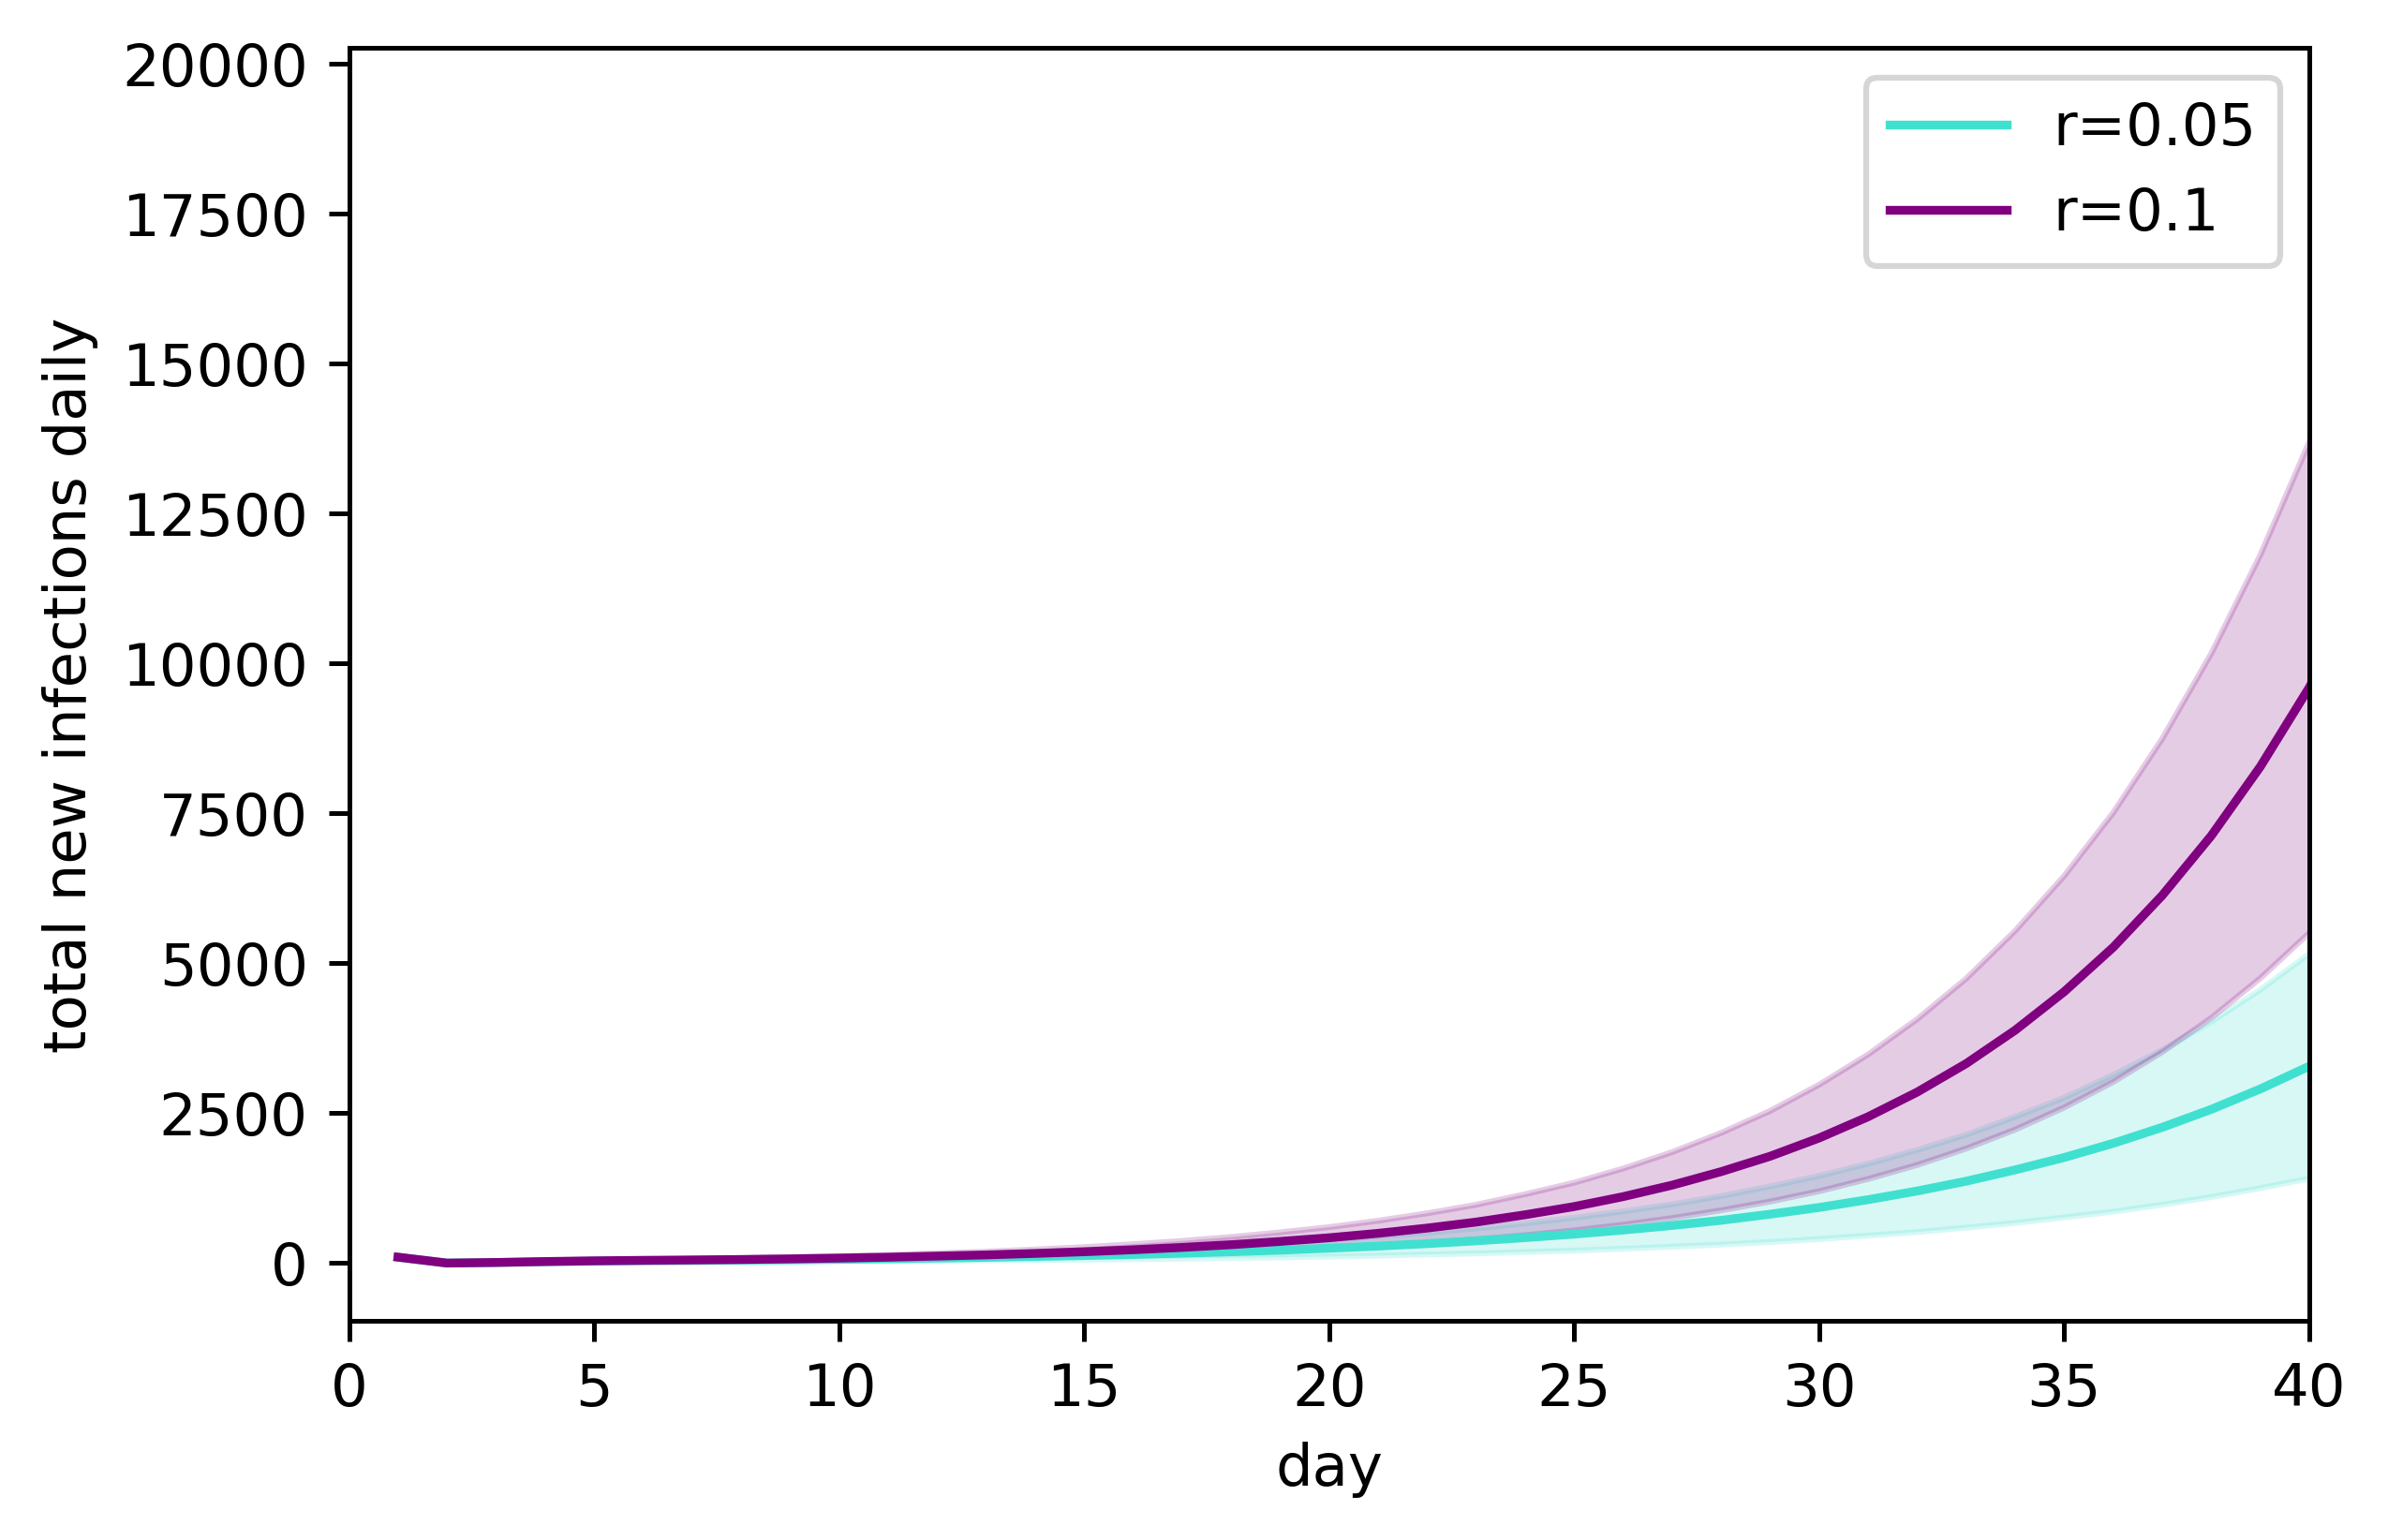

In [159]:
fig, ax = plt.subplots(dpi=450,figsize=(6,4))
x = range(1,61)
 
ax.plot(x, mean_daily1n, '-',c=colours_par[0.05],label='r=0.05')
ax.fill_between(x, mean_daily1n - variance_daily1n, mean_daily1n + variance_daily1n, alpha=0.2,color=colours_par[0.05])

ax.plot(x, mean_daily2n, '-',c=colours_par[0.1],label='r=0.1')
ax.fill_between(x, mean_daily2n - variance_daily2n, mean_daily2n + variance_daily2n, alpha=0.2,color=colours_par[0.1])

# ax.plot(x, mean_daily3, '-',c='blue',label='r=5',lw=1)
# ax.fill_between(x, mean_daily3 - variance_daily3, mean_daily3 + variance_daily3, alpha=0.2,color='blue')

# ax.plot(x, mean_daily4, '-',c='cornflowerblue',label='r=10',lw=1)
# ax.fill_between(x, mean_daily4 - variance_daily4, mean_daily4 + variance_daily4, alpha=0.2,color='cornflowerblue')

# ax.plot(x, mean_daily5, '-',c='green',label='r=0.01',lw=1)
# ax.fill_between(x, mean_daily5 - variance_daily5, mean_daily5 + variance_daily5, alpha=0.2,color='green')

# ax.plot(x, mean_daily6, '-',c='olive',label='r=0.032',lw=1)
# ax.fill_between(x, mean_daily6 - variance_daily6, mean_daily6 + variance_daily6, alpha=0.2,color='olive')

# ax.plot(x, mean_daily7, '-',c='seagreen',label='r=0.02',lw=1)
# ax.fill_between(x, mean_daily7 - variance_daily7, mean_daily7 + variance_daily7, alpha=0.2,color='seagreen')

# ax.plot(x, mean_daily8, '-',c='seagreen',label='r=0.05',lw=1)
# ax.fill_between(x, mean_daily8 - variance_daily8, mean_daily8 + variance_daily8, alpha=0.2,color='turquoise')

plt.xlabel('day')
plt.ylabel('total new infections daily')
plt.xlim(0,40)
# plt.ylim(0,3000)
plt.legend()